In [2]:
#Carregando as bibliotecas necessárias
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt


Esta função usa a biblioteca requests para baixar uma imagem da internet a partir de um URL fornecido. O conteúdo da resposta é então convertido em uma imagem usando PIL (Pillow), e a imagem é retornada.

In [3]:
def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

Esta função converte uma imagem colorida para escala de cinza usando o cv2.cvtColor. A imagem é passada como um array NumPy e a função retorna a imagem em tons de cinza.

In [4]:
def grayscale(image):
    return cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)


Esta função binariza uma imagem em tons de cinza. Utiliza a função cv2.threshold para aplicar uma operação de limiarização, convertendo a imagem em uma imagem binarizada (preto e branco).

In [5]:
def binarize(image):
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return binary_image

Esta função usa matplotlib para exibir as três imagens: original, em tons de cinza e binarizada. As imagens são exibidas em uma única linha, com cada uma delas em uma subtrama.

In [6]:
def show_images(original, gray, binary):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.title('Original')

    plt.subplot(1, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Escala de Cinza')

    plt.subplot(1, 3, 3)
    plt.imshow(binary, cmap='gray')
    plt.title('Binarizada')

    plt.show()

Função principal que coordena o processo. Ela chama as funções acima para baixar a imagem, converter para escala de cinza e binarizar, e em seguida chama a função show_images para exibir as imagens.

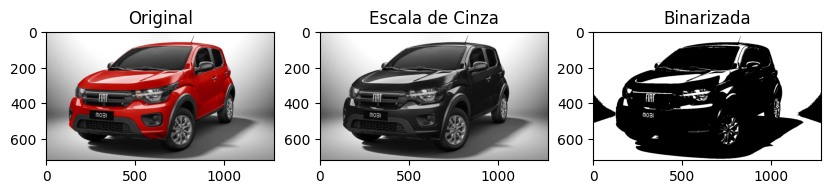

In [7]:
def main():
    # Substitua o URL pela imagem desejada
    image_url = "https://cdn.motor1.com/images/mgl/AkB8vL/s3/fiat-mobi-2023.jpg"

    # Baixar a imagem da internet
    img = download_image(image_url)

    # Converter para escala de cinza
    gray_img = grayscale(img)

    # Converter para imagem binarizada (preto e branco)
    binary_img = binarize(gray_img)

    # Mostrar as imagens usando matplotlib
    show_images(np.array(img), gray_img, binary_img)

if __name__ == "__main__":
    main()